<center><h1>Mapping the emotional face. How individual face parts contribute to successful emotion recognition.</h1></center>

# 5. Principal Component Analysis (PCA)

### Import modules

In [1]:
from myBasics import *
%matplotlib inline

from sklearn.decomposition import PCA as sklearnPCA

### get data

Get the big table, with values of each participant

In [2]:
participantDf = pd.read_csv('../outputs/weightStdDf.csv',index_col=[0,1,2])
participantDf.index.names = ['p','ident','emo']

In [3]:
participantDf.head()

0         1         2         3         4         5  \
p    ident emo                                                               
p001 f     ang -0.948401 -0.006541  1.667878 -1.262355 -1.262355 -0.320494   
           dis -0.245679  1.036125 -0.074772 -1.100216 -1.100216  0.437950   
           fea  0.582234 -1.040508 -1.040508 -1.040508  0.401929 -1.040508   
           hap  0.352580  1.057741 -0.151106 -0.856267 -0.352580 -1.359953   
           ntr -0.897600 -0.897600  0.157930  0.733673  0.349844 -1.089514   

                       6         7         8         9        10        11  \
p    ident emo                                                               
p001 f     ang -0.948401  0.412064 -1.262355 -0.948401  1.039971  1.458576   
           dis  1.548847  0.865218 -0.245679 -1.100216  1.121579 -1.100216   
           fea  0.401929  1.844366  0.401929  0.582234  1.844366  0.582234   
           hap  1.460690 -0.453318 -1.359953  1.460690  0.755529 -0.352580   
           ntr -1.089514 -0.801643 -1.089514 -0.321856  1.213459 -0.321856   

                      12        13        14        15        16        17  \
p    ident emo                                                               
p001 f     ang -1.262355  0.098110  0.935320 -1.262355 -0.948401  0.412064   
           dis  0.865218  0.779764  0.608857 -1.100216  0.608857 -0.587494   
           fea  0.221624  0.582234  1.664062  0.582234  0.582234 -1.040508   
           hap  0.554055 -0.554055 -0.856267 -0.654792 -0.050369  0.151106   
           ntr  0.157930  0.733673  0.157930  0.157930 -0.897600 -0.609728   

                      18        19        20        21        22        23  \
p    ident emo                                                               
p001 f     ang -1.262355  0.412064  1.039971 -1.262355 -0.006541 -0.320494   
           dis -0.074772 -1.100216 -1.100216  1.805208  1.890662  0.437950   
           fea  0.221624  0.582234 -1.040508  1.123148  0.221624 -1.040508   
           hap -1.359953 -0.957004  0.251843  1.057741 -0.957004 -0.957004   
           ntr  0.733673 -1.089514 -1.089514 -0.513771  0.061972 -0.321856   

                      24        25        26        27        28        29  \
p    ident emo                                                               
p001 f     ang -0.320494 -0.843750  2.400437  0.412064  1.353925  0.412064   
           dis -0.672947  0.352496  0.096135 -1.100216 -0.074772 -1.100216   
           fea -1.040508 -1.040508  0.221624  0.401929  0.221624  2.024671   
           hap -0.453318  0.251843 -0.755529 -0.352580  0.050369  0.251843   
           ntr  0.445801 -0.033985  0.157930 -1.089514 -0.705685  0.445801   

                      30        31        32        33        34        35  \
p    ident emo                                                               
p001 f     ang  1.458576 -0.006541 -1.262355 -1.262355 -1.262355  0.412064   
           dis  3.257920 -0.587494  0.523404 -0.074772  1.292486  0.352496   
           fea -1.040508 -1.040508 -1.040508  0.401929  1.844366  0.582234   
           hap -0.755529 -1.259216  1.158478  0.151106  0.554055  1.762902   
           ntr  0.349844  2.077074  0.541758  1.981117  0.829630 -1.089514   

                      36        37        38        39        40        41  \
p    ident emo                                                               
p001 f     ang  1.039971  0.098110 -0.320494 -0.320494  0.098110  0.098110   
           dis -1.100216 -1.100216  1.463394 -0.074772 -1.100216 -0.587494   
           fea -1.040508 -1.040508 -1.040508 -1.040508 -1.040508  2.024671   
           hap -1.359953  1.762902 -0.352580  1.158478 -0.352580  2.065113   
           ntr -0.705685 -0.321856  0.829630 -1.089514  0.157930 -1.089514   

                      42        43        44        45        46        47  
p    ident emo                                                              
p001 f     ang  0.098110  1.353925 -1.26

Get the averaged data

In [4]:
weightDf = pd.read_csv('../outputs/weightAvgStdDf.csv',
                      index_col=[0,1])
weightDf.index.names = ['ident','emo']
weightDf = weightDf.sortlevel()

In [5]:
weightDf.head()

0         1         2         3         4         5  \
ident emo                                                               
f     ang -0.107068 -0.090944  0.021346 -0.140837 -0.231097  0.120188   
      dis -0.197694  0.061481 -0.234455 -0.156955 -0.116681 -0.229027   
      fea  0.077753 -0.066480 -0.141368 -0.121815 -0.012927 -0.287902   
      hap -0.083151 -0.176273 -0.072354 -0.014752 -0.192790 -0.121763   
      ntr -0.123786 -0.018737  0.109495 -0.083957 -0.030939 -0.008957   

                  6         7         8         9        10        11  \
ident emo                                                               
f     ang -0.101582 -0.155755 -0.212338 -0.097965  0.484374  0.035292   
      dis -0.159949  0.004103 -0.161257 -0.209212 -0.077736 -0.004602   
      fea -0.147046 -0.017016 -0.061568  0.102944  0.736890 -0.114484   
      hap -0.207403 -0.184612 -0.123583 -0.118115  0.042775 -0.155732   
      ntr -0.170157 -0.192194 -0.176686  0.000314  0.661145 -0.199530   

                 12        13        14        15        16        17  \
ident emo                                                               
f     ang -0.089919  0.065455 -0.239384 -0.122578 -0.118693  0.146498   
      dis  0.010296  0.081108  0.119742 -0.017898 -0.184315 -0.036822   
      fea -0.240084  0.035541 -0.134807 -0.049666 -0.032427 -0.049715   
      hap  0.079402  0.812469  0.009954 -0.149744 -0.148304 -0.109140   
      ntr -0.004440  0.459792 -0.032845 -0.071983 -0.134917  0.030365   

                 18        19        20        21        22        23  \
ident emo                                                               
f     ang  0.044670  0.344048  0.145883  0.255147  0.364067 -0.061439   
      dis -0.108139 -0.043717  0.015189  0.921797  1.060071 -0.102794   
      fea -0.082939 -0.058181 -0.169369  0.198205  0.376390 -0.238898   
      hap -0.002345 -0.099668 -0.000368  0.759900  0.242644 -0.197336   
      ntr  0.063706 -0.197195 -0.052643  0.393009  0.604447 -0.353003   

                 24        25        26        27        28        29  \
ident emo                                                               
f     ang -0.129267 -0.147019  0.547444 -0.020446  0.031519  0.969053   
      dis -0.215771 -0.190616 -0.372721 -0.040695 -0.193600  1.098819   
      fea -0.011844  0.122511  0.026201 -0.099165 -0.007230  0.956243   
      hap -0.270702 -0.031605 -0.083610 -0.197457 -0.012785  0.837379   
      ntr -0.125066 -0.119348 -0.151487  0.079267  0.216065  0.114921   

                 30        31        32        33        34        35  \
ident emo                                                               
f     ang  0.477879 -0.226840 -0.233784 -0.146768  0.651934 -0.001234   
      dis  1.436805  0.007758 -0.214569 -0.222747 -0.209609 -0.005113   
      fea  0.122989 -0.072396 -0.224578  0.057937  0.839029  0.044465   
      hap  0.064816 -0.261093  0.001064 -0.101332  0.171326  0.087721   
      ntr  0.265603 -0.147549 -0.005426 -0.022756  0.952202 -0.034270   

                 36        37        38        39        40        41  \
ident emo                                                               
f     ang -0.250892 -0.034475 -0.133708 -0.271287 -0.215705 -0.245044   
      dis -0.151673  0.039613 -0.103777  0.084613  0.003531 -0.158570   
      fea -0.080408 -0.194371 -0.158883 -0.196069  0.083162 -0.133403   
      hap  0.196049  0.715466 -0.149423 -0.221160  0.064848  0.033526   
      ntr  0.063469 -0.343780 -0.107934 -0.172750 -0.253165  0.041902   

                 42        43        44        45        46        47  
ident emo                                                              
f     ang -0.127644 -0.094971 -0.183468 -0.170725 -0.187689 -0.114234  
      dis -0.139650 -0.259681 -0.120911 -0.063685 -0.158616 -0.081669  
      fea -0.140680 -0.028346 -0.066560 -0.174366  0.049001 -0.214271  
      hap  0.002885 -0.177391 -0.076576  0.016847 -0.201242 -0.197262  
  

## Perform the PCA

In [6]:
sklearn_pca = sklearnPCA(n_components= 5 )
sklearn_pca_avg = sklearnPCA(n_components= 5 )

In [7]:
Y_sklearn = sklearn_pca.fit_transform(participantDf)
Y_sklearn_avg = sklearn_pca_avg.fit_transform(weightDf)

### Eigenvectors  

These are the n extracted principal components. Each PC is composed of as many values as there are dimensions/features. Each value of the PC tells us the weight of the original dimension/feature.

In [8]:
sklearn_pca.explained_variance_ratio_

array([ 0.04527311,  0.04126415,  0.03624892,  0.03417348,  0.03285534])

In [9]:
sklearn_pca_avg.explained_variance_ratio_

array([ 0.37123251,  0.17716699,  0.11721804,  0.07849316,  0.05756008])

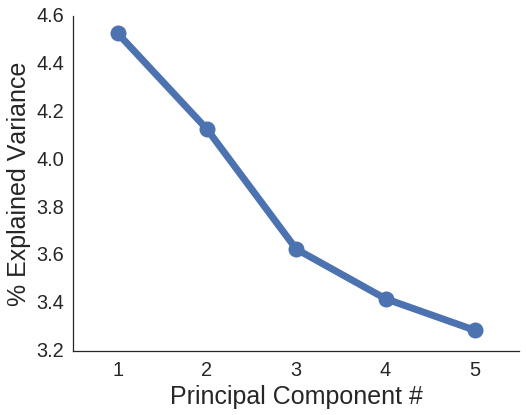

In [10]:
fig = plt.figure(figsize=(8,6))

expVar = sklearn_pca.explained_variance_ratio_

plt.plot(expVar*100, '-o',linewidth=7,markersize=16)
plt.xlim(-0.5,4.5)
plt.yticks(fontsize=20)
plt.xticks(np.arange(5),np.arange(1,5+1),fontsize=20)

plt.xlabel('Principal Component #',fontsize=25)
plt.ylabel('% Explained Variance',fontsize=25)

sns.despine()

plt.savefig('../figures/pcaExpVar.png',dpi=300)
plt.show()

### Project the weigths of each PC onto the original feature space

In [11]:
def plotPCWeights(Y_sklearn,components,explained_variance,figName='../figures/pcaCbar.png'):

    # set basic figure properties
    plt.figure(figsize=(16,6))

    w,h = (6,8)
    # loop through all eigenvectors
    for index,thisPC in enumerate(components):

        # make an empty w*h matrix with zeros
        a = np.zeros(shape=(w,h))

        # counter for the features
        count = 0
        
        # we loop through the matrix in a structured way
        for x in range(w):
            for y in range(h):
                a[x][y] = thisPC[count]
                count+=1

        # make a subplot
        ax = plt.subplot(1,len(components),index+1)

        # the heatmap: we have to transpose the matrix so it is oriented
        # as the picture was; we write the weights into each tile and get
        # rid of all other annotations
        sns.heatmap(a.T,
                    square=True,
                    cbar=False,
                    vmin=-0.4,vmax=0.4,
                    xticklabels=False,
                    yticklabels=False,
                    cmap=None)

        # the % explained variance is computed from the eigenvalue*100
        # we round for plotting reasons
        varExp = round(explained_variance[index]*100,1)
        
        # title with explained variance for each PC
        plt.title('PC #'+str(index+1)+'\nExplained. Var: '+str(varExp)+'%') 
        
    # shows all subplots
    plt.savefig(figName,dpi=300)
    plt.show()

In [32]:
def plotPCWeights(Y_sklearn,components,explained_variance,ax,figName='../figures/pcaCbar.png'):

    w,h = (6,8)
    # loop through all eigenvectors
    for index,thisPC in enumerate(components):

        # make an empty w*h matrix with zeros
        a = np.zeros(shape=(w,h))

        # counter for the features
        count = 0
        
        # we loop through the matrix in a structured way
        for x in range(w):
            for y in range(h):
                a[x][y] = thisPC[count]
                count+=1

        # make a subplot
        myAx = plt.subplot(1,len(components),index+1)

        # the heatmap: we have to transpose the matrix so it is oriented
        # as the picture was; we write the weights into each tile and get
        # rid of all other annotations
        ax = sns.heatmap(a.T,
                    square=True,
                    cbar=False,
                    vmin=-0.4,vmax=0.4,
                    xticklabels=False,
                    yticklabels=False,
                    cmap=None,
                    ax=myAx)

        # the % explained variance is computed from the eigenvalue*100
        # we round for plotting reasons
        varExp = round(explained_variance[index]*100,1)
        
        # title with explained variance for each PC
        myAx.set_title('PC #'+str(index+1)+'\nExplained. Var: '+str(varExp)+'%',fontsize=18) 
        
    return ax;

With all data:

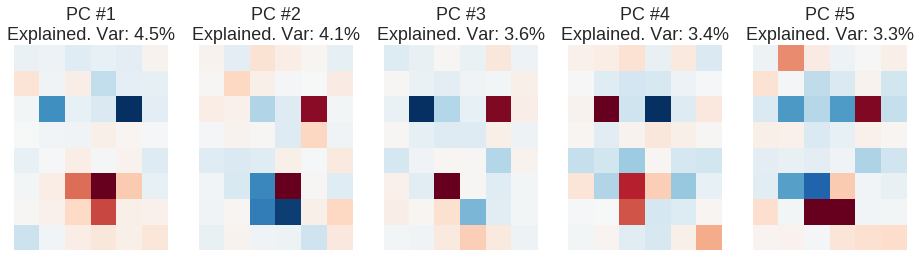

In [33]:
f, ( ax1 ) = plt.subplots( 1,2,figsize=(16,8) );

plotPCWeights(Y_sklearn,
              sklearn_pca.components_,
              sklearn_pca.explained_variance_ratio_,
              ax1);
plt.savefig('../figures/pcaWeightsFaces.png',dpi=300)

With data averaged by condition (just out of curisity):  

obviously, with only 14 data points, we can explain much more variance...

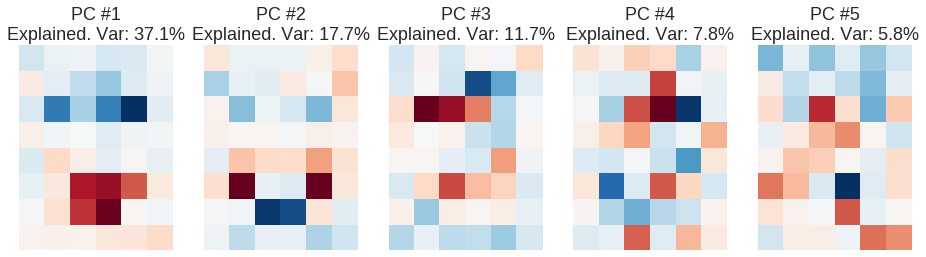

In [34]:
f, ( ax1 ) = plt.subplots( 1,2,figsize=(16,8) );

plotPCWeights(Y_sklearn,
              sklearn_pca_avg.components_,
              sklearn_pca_avg.explained_variance_ratio_,
              ax1);

### Projecting the faces back into the PCA-space

In [15]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib._png import read_png

### Transform the values of each participant into the space

Project the data of each participant (48 tiles each) to the PCA space, where there are only 5 dimensions, each a combination of the 48 tiles

In [16]:
def makeParticipantPCA(participantDf,sklearn_pca=sklearn_pca):
    pcaDf = pd.DataFrame()
    for p in participantDf.index.levels[0]:
        thisEntry = sklearn_pca.transform( participantDf.ix[p] )
        thisDf = pd.DataFrame(thisEntry)
        thisDf.index = participantDf.ix[p].index
        # add participant name
        thisDf['p'] = p
        thisDf.set_index('p', append=True, inplace=True)
        thisDf = thisDf.reorder_levels(['p', 'ident', 'emo'])
        # add to group df
        pcaDf = pd.concat([pcaDf,thisDf])
    return pcaDf

In [17]:
pcaDf = makeParticipantPCA(participantDf)

In [18]:
pcaDf.head()

0         1         2         3         4
p    ident emo                                                  
p001 f     ang  1.037068 -0.412058 -2.594713 -0.848840 -0.719657
           dis -0.657484 -2.868062  0.989515  1.414985  1.985290
           fea -1.093147  2.201858  0.527650  1.874243 -0.414441
           hap -0.403686  1.290129  0.843942  0.691269 -0.864649
           ntr -0.874690  0.397866 -0.769708  0.110667 -0.323192

### Plotting

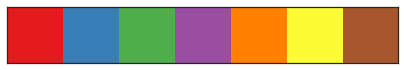

In [19]:
sns.palplot(stackColors)

Function to plot the data as a scatterplot

In [41]:
def makeScatterPCA(pcaDf,ax,identDict=identDict,emoDict=emoDict):

    # average over all participants
    meanPca = pcaDf.groupby(level=[1,2]).mean()
    n = len(pcaDf.index.levels[0])
    stdPca = pcaDf.groupby(level=[1,2]).std()/np.sqrt(n)*1.96

    # make the scatterplot
    for ident,emo in meanPca.index:
        
        thisMean = meanPca.ix[ident].ix[emo]
        thisStd = stdPca.ix[ident].ix[emo]

        myAx = ax.errorbar(thisMean[0], thisMean[1],
                           xerr = thisStd[0],yerr=thisStd[1],
                           c=stackColors[emoReverse[emo]],
                           ecolor='gray',
                           marker='ov'[identReverse[ident]],
                           markersize=15,
                           markeredgecolor='gray',
                           markeredgewidth=.5,
                           label=ident+' '+emo
                           );

    sns.despine()
    ax.set_xlim(-1.5,2);ax.set_ylim(-1,1)
    ax.set_ylabel("PC 2"); ax.set_xlabel("PC 1")
    #ax.legend(loc='upper right')

    return myAx

Function to plot the pictures

In [42]:
def makePicturePCA(pcaDf,ax,identDict=identDict,emoDict=emoDict,myZoom=.15):
    
    # average over all participants
    meanPca = pcaDf.groupby(level=[1,2]).mean()
    # make the scatterplot
    myAx = ax.scatter(meanPca[0], meanPca[1])

    # annoate it with the index labels from the dataframe
    for label, x, y in zip(meanPca.index, meanPca[0], meanPca[1]):

        imagebox = OffsetImage(read_png(picList[identReverse[label[0]] ][emoReverse[label[1]] ]), zoom=myZoom)
        ab = AnnotationBbox(imagebox, [x,y],pad=0)
        ax.add_artist(ab)

    sns.despine()        
    ax.set_ylabel("PC 2"); ax.set_xlabel("PC 1")
    ax.set_xlim(-1.5,2);ax.set_ylim(-1,1)
    
    return myAx;

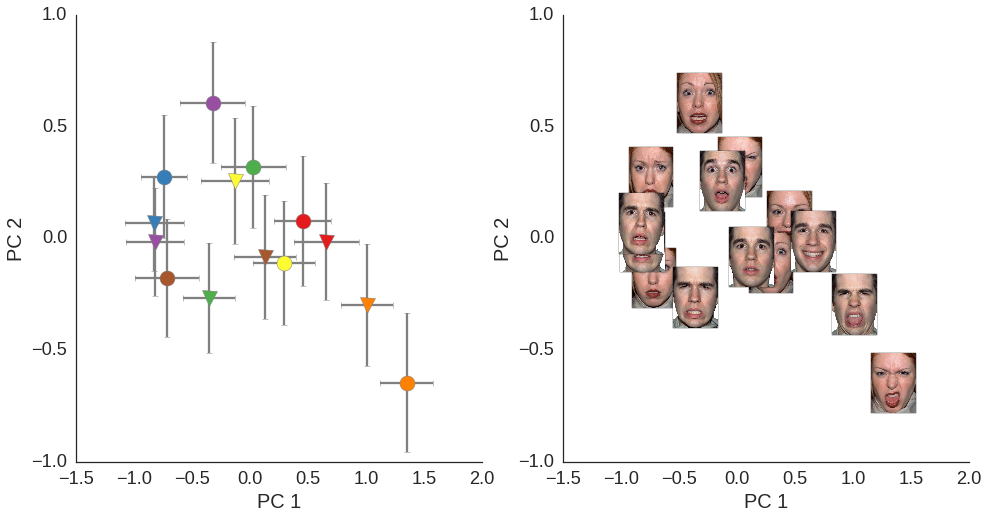

In [43]:
f, (ax1,ax2 ) = plt.subplots( 1,2,figsize=(16,8) );
makeScatterPCA(pcaDf,ax1);
makePicturePCA(pcaDf,ax2,myZoom=.15);
#plt.savefig('../figures/pcaScatter.png',dpi=300)

## Interactive Plots

In [44]:
import time

### With weights projected into face space

In [39]:
participantList = participantDf.index.levels[0]
for i in range(len(participantList)):
    time.sleep(0.01)
    thisDf = participantDf.ix[participantList[:i+1]]
    this_pca = sklearnPCA(n_components= 5 )
    this_Y = this_pca.fit_transform(thisDf)

    f, ( ax1 ) = plt.subplots( 1,2,figsize=(16,8) );

    plotPCWeights(this_Y,
                  this_pca.components_,
                  this_pca.explained_variance_ratio_,
                  ax1);
    f.suptitle("sample size: "+str(i+1),fontsize=30)
    f.savefig('../moviePics/pcaWeights'+('00'+str(i+1))[-3:]+'.png');
    plt.close('all')

In [40]:
pcaPics = getFile('../moviePics/','pcaWeights*.png')
pcaPics[-5:]

['../moviePics/pcaWeights090.png',
 '../moviePics/pcaWeights091.png',
 '../moviePics/pcaWeights092.png',
 '../moviePics/pcaWeights093.png',
 '../moviePics/pcaWeights094.png']

### With scatterplots

In [47]:
participantList = participantDf.index.levels[0]
for i in range(len(participantList)):
    thisDf = participantDf.ix[participantList[:i+1]]
    pcaDf = makeParticipantPCA(thisDf)
    f, (ax1,ax2 ) = plt.subplots( 1,2,figsize=(16,8) );
    makeScatterPCA(pcaDf,ax1);
    makePicturePCA(pcaDf,ax2);
    f.suptitle("sample size: "+str(i+1),fontsize=30)
    f.savefig('../moviePics/pcaHybrid'+('00'+str(i+1))[-3:]+'.png');
    plt.close('all')

In [48]:
pcaPics = getFile('../moviePics/','pcaHybrid*.png')
pcaPics[-5:]

['../moviePics/pcaHybrid090.png',
 '../moviePics/pcaHybrid091.png',
 '../moviePics/pcaHybrid092.png',
 '../moviePics/pcaHybrid093.png',
 '../moviePics/pcaHybrid094.png']